In [1]:
import os

os.environ["CUDA_DEVICE_ORDER"]="PCI_BUS_ID"   
os.environ["CUDA_VISIBLE_DEVICES"]='0'

os.environ["HF_HOME"]="~/codes/.cache/huggingface"

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
def show_images(images, scores, test_artist, train_artists):
    n: int = len(images)
    f = plt.figure(figsize=(16, 2))
    for i in range(n):
        # Debug, plot figure
        ax = f.add_subplot(1, n, i + 1)
        if i==0:
            pass
            ax.title.set_text(test_artist)
        else:
            ax.title.set_text(str(np.round(scores[i-1], 4))+'\n'+train_artists[i-1])
            ax.axis('off')
        if images[i]==None:
            pass
        else:
            plt.imshow(images[i])

    plt.show(block=True)

In [4]:
from datasets import load_dataset

In [5]:
import pickle

In [6]:
with open('../../data/indices/5000-0.5/idx-train.pkl', 'rb')  as handle:
    idx_train = pickle.load(handle)
len(idx_train)   

5000

In [7]:
with open('../../data/indices/5000-0.5/idx-val.pkl', 'rb')  as handle:
    idx_val = pickle.load(handle)
len(idx_val)

1000

In [1]:
from datasets import load_dataset

dataset = load_dataset(
    'cifar10',
    # args.dataset_config_name,
    # cache_dir=args.cache_dir,
    # split="train",
)

NameError: name 'load_dataset' is not defined

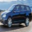

In [9]:
from datasets import DatasetDict, Dataset, load_dataset, Image

train_dataset = dataset['train'].select(idx_train)
train_dataset[0]["img"]

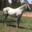

In [10]:
val_dataset =  dataset['test'].select(idx_val)
val_dataset[0]["img"]

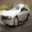

In [11]:
import pandas as pd
df = pd.DataFrame()
df['path'] = ['{}/{}.png'.format('../../saved/5000-0.5/gen', i) for i in range(1000)]

from datasets import DatasetDict, Dataset, load_dataset, Image
dataset = DatasetDict({
"train": Dataset.from_dict({
    "img": df['path'].tolist(),
}).cast_column("img", Image()),})
gen_dataset = dataset["train"]
gen_dataset[0]['img']

In [12]:
from sklearn.model_selection import train_test_split
_, test_index = train_test_split(range(1000), test_size=60, random_state=42)
test_index

[521,
 737,
 740,
 660,
 411,
 678,
 626,
 513,
 859,
 136,
 811,
 76,
 636,
 973,
 938,
 899,
 280,
 883,
 761,
 319,
 549,
 174,
 371,
 527,
 210,
 235,
 101,
 986,
 902,
 947,
 346,
 139,
 621,
 499,
 370,
 198,
 687,
 584,
 901,
 59,
 328,
 96,
 312,
 974,
 299,
 277,
 924,
 601,
 439,
 837,
 570,
 879,
 261,
 578,
 23,
 30,
 617,
 10,
 221,
 820]

In [13]:
with open("../../data/indices/5000-0.5/counter/idx-gen-sampled.pkl", 'wb') as handle:
    pickle.dump(test_index, handle)

In [14]:
test_index

[521,
 737,
 740,
 660,
 411,
 678,
 626,
 513,
 859,
 136,
 811,
 76,
 636,
 973,
 938,
 899,
 280,
 883,
 761,
 319,
 549,
 174,
 371,
 527,
 210,
 235,
 101,
 986,
 902,
 947,
 346,
 139,
 621,
 499,
 370,
 198,
 687,
 584,
 901,
 59,
 328,
 96,
 312,
 974,
 299,
 277,
 924,
 601,
 439,
 837,
 570,
 879,
 261,
 578,
 23,
 30,
 617,
 10,
 221,
 820]

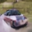

In [15]:
gen_dataset[test_index[0]]['img']

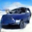

In [16]:
gen_dataset[test_index[1]]['img']

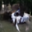

In [17]:
gen_dataset[test_index[2]]['img']

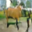

In [18]:
gen_dataset[test_index[3]]['img']

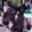

In [19]:
gen_dataset[test_index[4]]['img']

In [20]:
scores_list = []

In [21]:
with open("gen_5000_0.5_loss_100_5000000.0_0.16133635662548987.pkl", 'rb') as handle:
    scores = pickle.load(handle)
scores_list.append(scores)
scores.shape

(1000, 5000)

In [22]:
with open("gen_5000_0.5_mean-squared-l2-norm_100_5000000.0_0.2601777247421162.pkl", 'rb') as handle:
    scores = pickle.load(handle)
scores_list.append(scores)
scores.shape

(1000, 5000)

In [23]:
# load ground truth
my_list = [
    0,1,2,3,
    4,5,6,7,
    8,9,10,11,
    12,13,14,15,
    16,17,18,19,
    20,21,22,23,
    24,25,26,27,
    28,29,30,31,
    32,33,34,35,
    36,37,38,39,
    40,41,42,43,
    44,45,46,47,
    48,49,50,51,
    52,53,54,55,
    56,57,58,59,
    60,61,62,63,
          ]

In [24]:
loss_array_list = []

for i in my_list:
    for seed in [
        0,
                 1,
                 2,
                 # 3,
                 # 4,
                ]:
        for e_seed in [
            0, 
                       1, 
                       2
                      ]:
            with open('../../saved/5000-0.5/lds-val/ddpm-sub-{}-{}/e-{}-gen.pkl'.format(i, seed, e_seed), 'rb')  as handle:
                loss_list = pickle.load(handle)
            margins = np.concatenate(loss_list, axis=-1) # -logp
            ####
            if (seed==0) and (e_seed)==0:
                loss_array = margins
            else:
                loss_array += margins
            
    loss_array = loss_array/(3*3)
    
    loss_array_list.append(loss_array)
lds_loss_array = np.stack(loss_array_list)
lds_loss_array.shape

(64, 1000, 1000)

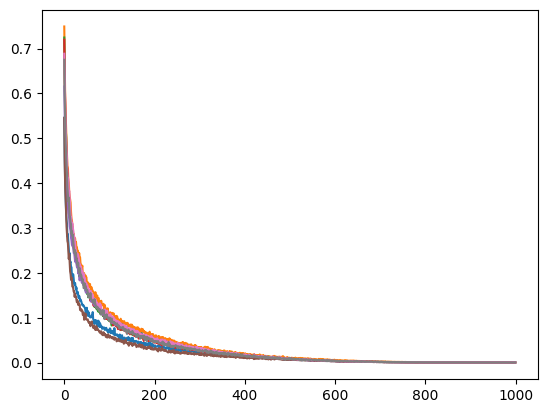

In [25]:
for i in range(1):
    for j in range(8):
        plt.plot(lds_loss_array[i, :, j], color="C{}".format(j))
    # break

In [26]:
mask_array_list = []

for i in my_list:
    # print(i)
    with open('../../data/indices/5000-0.5/lds-val/sub-idx-{}.pkl'.format(i), 'rb')  as handle:
        sub_idx_train = pickle.load(handle)
    # print(len(sub_idx_train))
    mask_array = np.in1d(idx_train, sub_idx_train)
        
    mask_array_list.append(mask_array)
    
lds_mask_array = np.stack(mask_array_list)
lds_mask_array.shape

(64, 5000)

In [27]:
lds_testset_correctness = lds_loss_array.mean(axis=1)
lds_testset_correctness.shape

(64, 1000)

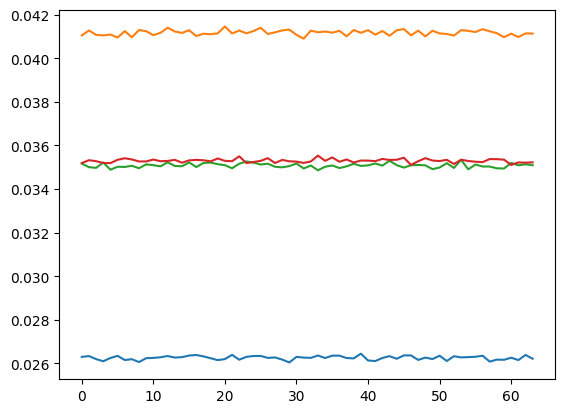

In [28]:
for j in range(4):
    plt.plot(lds_testset_correctness[:, j], color="C{}".format(j))
    # break
# plt.ylim(0.15, 0.2)

In [29]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[0]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

# tmp_1 = rs

Correlation: 0.161 (avg p value 0.299659)


In [30]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[0]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in test_index:
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

tmp_1 = rs

Correlation: 0.198 (avg p value 0.244832)


In [31]:
tmp_1

array([ 0.00086996,  0.12820513,  0.13379121,  0.08127289,  0.16144689,
        0.36767399,  0.03127289,  0.38745421,  0.07783883,  0.46694139,
        0.33695055,  0.04184982,  0.06451465,  0.19688645,  0.07637363,
        0.19652015,  0.3154304 ,  0.08255495,  0.39674908,  0.27312271,
        0.26048535,  0.18956044, -0.0650641 ,  0.29574176,  0.09102564,
       -0.1117674 ,  0.2260989 ,  0.03200549,  0.34729853,  0.25444139,
        0.0746337 ,  0.33452381,  0.15169414,  0.04015568,  0.24285714,
        0.43328755,  0.18173077,  0.24001832,  0.32728938,  0.22371795,
        0.09340659,  0.09388844,  0.04276557,  0.22055861,  0.29688645,
        0.18104396,  0.17271062,  0.13836996,  0.41414835,  0.39848901,
        0.3125    ,  0.17129121,  0.28351648, -0.01529304,  0.29184982,
        0.29716117,  0.23598901,  0.18021978,  0.23937729,  0.23901099])

In [32]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[1]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in range(1000):
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

# tmp_2 = rs

Correlation: 0.260 (avg p value 0.142673)


In [33]:
# compute lds
from scipy.stats import spearmanr, pearsonr
####
margins = lds_testset_correctness
infl_est_ = -scores_list[1]
# infl_est_ = -tmp
preds = lds_mask_array @ infl_est_.T
####
rs = []
ps = []

for ind in test_index:
    r, p = spearmanr(preds[:, ind], margins[:, ind])
    # r, p = pearsonr(preds[:, ind], margins[:, ind])
    rs.append(r)
    ps.append(p)
    
rs, ps = np.array(rs), np.array(ps)
print(f'Correlation: {rs.mean():.3f} (avg p value {ps.mean():.6f})')

tmp_2 = rs

Correlation: 0.287 (avg p value 0.101265)


In [34]:
tmp_2

array([-0.05695971,  0.21098901,  0.33672161,  0.3625    ,  0.2510989 ,
        0.2771978 ,  0.10338828,  0.40027473,  0.37811355,  0.38328755,
        0.47454212,  0.0375    ,  0.24766484,  0.22229853,  0.37129121,
        0.32449634,  0.31936813,  0.35874542,  0.2474359 ,  0.36643773,
        0.47261905,  0.47152015,  0.28800366,  0.30567766,  0.07005495,
        0.15013736,  0.27568681,  0.29368132,  0.38411172,  0.16025641,
        0.31936813,  0.27257326,  0.12628205,  0.39555861,  0.50315934,
        0.46181319,  0.30906593,  0.26923077,  0.39239927,  0.05952381,
        0.15961538,  0.30648245,  0.16739927,  0.30654762,  0.54354396,
        0.2385989 ,  0.26588828,  0.35837912,  0.36886447,  0.44688645,
        0.2106685 ,  0.26350733,  0.23099817,  0.33447802,  0.18086081,
        0.18846154,  0.2632326 ,  0.14977106,  0.54029304,  0.10384615])

In [35]:
scores_list[0][test_index].shape

(60, 5000)

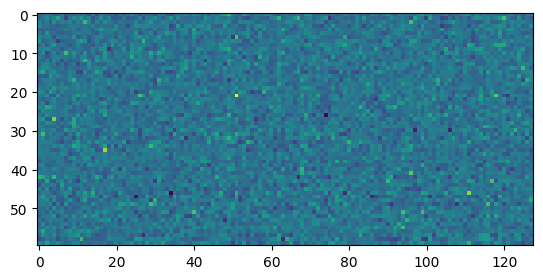

In [36]:
plt.imshow(scores_list[0][test_index][:, 0:128])

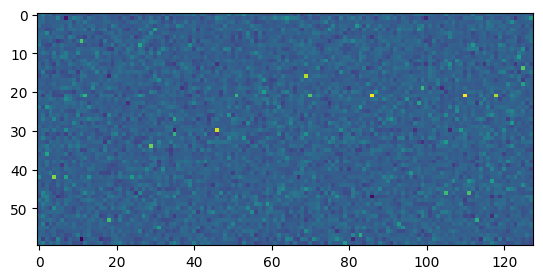

In [37]:
plt.imshow(scores_list[1][test_index][:, 0:128])

In [38]:
np.random.seed(42)
scores_list.append(np.random.rand(1000, 5000))
len(scores_list)

3

In [39]:
for index, my_i in enumerate(test_index):
    print(index, my_i)
    for k in [
        # 250, 
        500, 1000, 2500, 
              # 5000
             ]:
        D_trak=-scores_list[0][my_i]
        topK_trak = np.arange(10000)[D_trak.argsort()[0:k]]

        D_ours=-scores_list[1][my_i]
        topK_ours = np.arange(10000)[D_ours.argsort()[0:k]]

        ####
        D_random=-scores_list[2][my_i]
        topK_random = np.arange(10000)[D_random.argsort()[0:k]]
        ####

        # print(len(np.intersect1d(topK_trak, topK_ours)))
        # print(len(np.union1d(topK_trak, topK_ours)))
        print(len(np.intersect1d(topK_trak, topK_ours))/len(np.union1d(topK_trak, topK_ours))) # Jaccard similarity

        ####
        new_idx_trak = np.delete(idx_train, topK_trak)
        # print(len(new_idx_trak))
        print(new_idx_trak[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-TRAK.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_trak, handle)
        ####
        new_idx_ours = np.delete(idx_train, topK_ours)
        # print(len(new_idx_ours))
        print(new_idx_ours[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-Ours.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_ours, handle)
        ####
        new_idx_random = np.delete(idx_train, topK_random)
        # print(len(new_idx_random))
        print(new_idx_random[0:5])

        with open("../../data/indices/5000-0.5/counter/{}-{}-Random.pkl".format(index, k), 'wb') as handle:
            pickle.dump(new_idx_random, handle)

0 521
0.19617224880382775
[17488 17769 25061  7882  4701]
[17488 25061  7882  4701 38681]
[17488 17769 25061  7882  4701]
0.2360939431396786
[17488 17769 25061  7882  4701]
[17488 25061  4701 38681 11482]
[17488 17769 25061  7882 38681]
0.43719459614831846
[17488 17769  7882  4701 38681]
[ 4701 11482 37495 39588  5729]
[25061 37495 25183 20314 49017]
1 737
0.19331742243436753
[17488 17769 25061  7882  4701]
[17488 17769 25061  7882  4701]
[17488 17769 25061  7882  4701]
0.20409391932570742
[17488 17769  7882  4701 11482]
[17488 25061  7882  4701 11482]
[17488 17769 25061  7882  4701]
0.3947001394700139
[17488 17769  7882 37495 37777]
[25061  7882  4701 11482 37495]
[25061  7882  4701 11482 39588]
2 740
0.21951219512195122
[17488 17769 25061  7882 38681]
[17488 17769 25061  7882  4701]
[17488 17769 25061  7882  4701]
0.23839009287925697
[17769 25061  7882 38681 11482]
[17488 25061  7882  4701 38681]
[17769 25061  4701 38681 11482]
0.416029453412631
[17769  7882 38681  5729  3832]
[25061